In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_3.csv", sep = ";").drop("Unnamed: 0", 1)
train, test = train_test_split(data, test_size=0.30)
data.describe()

,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_LINGUA,NU_IDADE,TP_ANO_CONCLUIU,Escolaridade_Pai,Escolaridade_Mae,Ocupacao_Pai,Renda_Mensal,Renda_per_capta,Computador_por_pessoa,Celulares_por_pessoa
count,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06
mean,1.952823e-03,-1.379273e-04,-2.337789e-03,8.082849e-05,-2.425244e-02,-9.367279e-04,1.038642e-03,3.386821e-06,-1.779899e-02,-7.818498e-03,-2.259718e-02,-4.885861e-02,8.362171e+02,2.075064e-01,6.735228e-01
std,3.811280e-01,1.659481e-01,3.946580e-01,4.039205e-02,4.916430e-01,4.703076e-01,2.667147e-01,5.908589e-02,6.772674e-01,6.503605e-01,7.001105e-01,9.171282e-01,1.254462e+03,2.534051e-01,3.109964e-01
min,-4.146910e-01,-1.988856e-01,-5.230838e-01,-1.584228e-02,-1.824682e+00,-4.971218e-01,-4.055080e-01,-8.809104e-02,-1.707128e+00,-1.265097e+00,-1.819720e+00,-2.971101e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-3.420107e-01,-1.988856e-01,-5.230838e-01,-1.584228e-02,9.853229e-03,-4.971218e-01,-1.623837e-01,-4.679373e-02,-3.922961e-01,-2.124262e-01,-3.415952e-02,-6.658565e-01,2.994000e+02,0.000000e+00,5.000000e-01
50%,-1.470738e-02,1.384236e-01,2.793551e-01,6.392830e-03,9.853229e-03,4.448430e-01,-1.845375e-02,2.340675e-02,2.036856e-01,-2.124262e-01,2.120150e-01,3.122772e-01,4.990000e+02,2.000000e-01,6.666667e-01
75%,3.108230e-01,1.384236e-01,2.793551e-01,6.392830e-03,2.792401e-01,4.448430e-01,1.669237e-01,2.340675e-02,5.818676e-01,3.761003e-01,2.873361e-01,8.320185e-01,8.316667e+02,3.333333e-01,1.000000e+00
max,7.673745e-01,1.384236e-01,9.992840e-01,6.757275e-01,2.792401e-01,4.448430e-01,1.945867e+00,1.309356e-01,1.107397e+00,1.249667e+00,8.045838e-01,1.098417e+00,3.000000e+04,4.000000e+00,4.000000e+00


## Finding the best model

### XGBoost

Precision: 70.29%
Recall: 74.63%


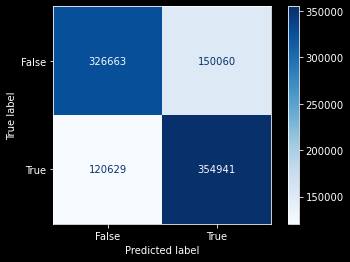

In [3]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")*100, 2)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")*100, 2)

print("Precision: " + str(precision) + "%")
print("Recall: " + str(recall) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues,
                      values_format = "d")

### Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier().fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)

print("Precision: " + str(precision*100) + "%")
print("Recall: " + str(recall*100) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues, 
                      values_format = "d")

### Finding the best parameters

In [ ]:
grid = {'max_depth':          [12, 15, 20, 30, 40],
        'min_samples_split':  [200, 500, 700, 1000],
        'min_samples_leaf':   [20, 30, 40, 50, 60, 80],
        'ccp_alpha':          [0.00001, 0.000005, 0.000001, 0],
        'min_impurity_decrease': [0.00001, 0.000005, 0.000001, 0.0000005, 0]
        }

rf = DecisionTreeClassifier()
rf_random = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, n_jobs = -1, verbose = 1)
rf_random.fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
rf_random.best_params_

In [ ]:
data = pd.read_csv("../dataset/dataset_3.csv", sep = ";").drop("Unnamed: 0", 1)
train, test = train_test_split(data, test_size=0.30)

In [ ]:
model = DecisionTreeClassifier(max_depth = 12, min_samples_split = 500,
                               min_samples_leaf = 40, ccp_alpha = 0.000001, 
                               min_impurity_decrease = 0.000001).fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)

print("Precision: " + str(precision*100) + "%")
print("Recall: " + str(recall*100) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues, 
                      values_format = "d")

### Plotting tree

In [ ]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(35, 15))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(35, 15), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

plt.figure(figsize=(100,50))
tree.plot_tree(model, feature_names=data.columns, class_names= ["Abaixo_da_Media", "Acima_da_Media"],
                filled=True, max_depth=4, fontsize=16)

### Storing the predictions for entire dataset

In [4]:
predictions = model.predict(data.drop(["DESEMPENHO_BAIXO"], 1))
data["Previsao"] = predictions

def mapea_acertou(data):
    if data["Previsao"] == 0 and data["DESEMPENHO_BAIXO"] == 0: return 1
    if data["Previsao"] == 1 and data["DESEMPENHO_BAIXO"] == 1: return 1
    else: return 0

data["Acertou"] = data.apply(mapea_acertou, 1)

## Saving data

In [5]:
data.to_csv("../dataset/dataset_4.csv", sep = ";")